In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\OLA\Downloads\datacamp_workspace_export_2023-01-21 03_58_34.csv')
df.head()

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer,featured,orders
0,1491015,6,67,638,56,B,7.0,2290,Rice Bowl,Indian,157.14,311.43,0,0,5075
1,1440194,40,92,526,34,C,2.9,2704,Other Snacks,Thai,291.03,291.03,0,0,41
2,1415786,2,81,526,34,A,4.0,1109,Rice Bowl,Indian,258.99,294.94,1,0,379
3,1074662,12,152,576,34,B,4.0,1109,Rice Bowl,Indian,268.69,268.69,0,0,690
4,1198250,116,10,590,56,B,6.3,1207,Beverages,Continental,354.05,493.76,0,0,135


In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1333 non-null   int64  
 1   week            1333 non-null   int64  
 2   center_id       1333 non-null   int64  
 3   city_code       1333 non-null   int64  
 4   region_code     1333 non-null   int64  
 5   center_type     1333 non-null   object 
 6   op_area         1333 non-null   float64
 7   meal_id         1333 non-null   int64  
 8   category        1333 non-null   object 
 9   cuisine         1333 non-null   object 
 10  checkout_price  1333 non-null   float64
 11  base_price      1333 non-null   float64
 12  emailer         1333 non-null   int64  
 13  featured        1333 non-null   int64  
 14  orders          1333 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 156.3+ KB


id                0
week              0
center_id         0
city_code         0
region_code       0
center_type       0
op_area           0
meal_id           0
category          0
cuisine           0
checkout_price    0
base_price        0
emailer           0
featured          0
orders            0
dtype: int64

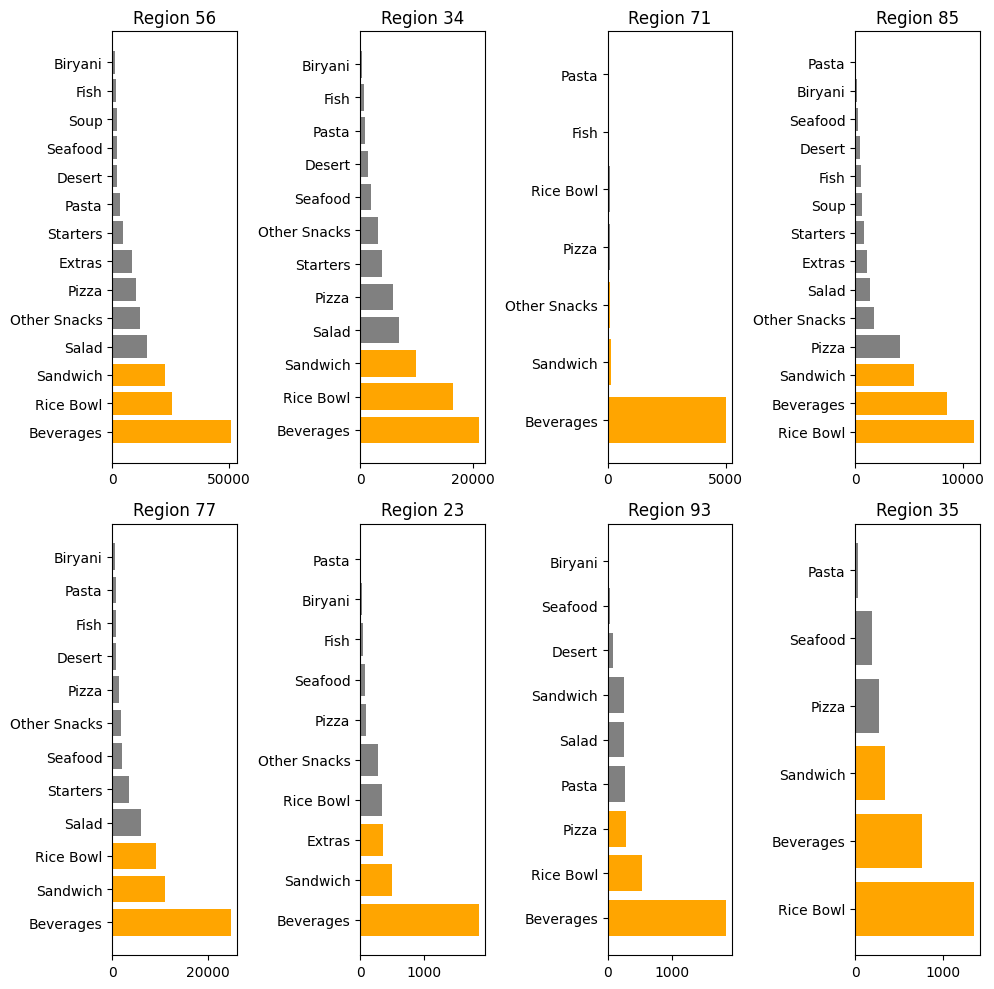

In [4]:
# Create subplots
rows, columns = 2, 4
fig, axs = plt.subplots(rows, columns, figsize=(10, 10))

# Define a region code list
region = [56, 34, 71, 85, 77, 23, 93, 35]

# Loop over the region codes
for i, region_code in enumerate(region):
    # Filter the dataframe by region code
    rc = df[df['region_code'] == region_code]
    
    # Aggregate the number of orders by category
    orders_by_category = rc.groupby('category')['orders'].sum()
    
    # Convert the aggregated data to a dataframe
    frame = pd.DataFrame(orders_by_category)
    frame = frame.reset_index('category')
    frame=frame.sort_values('orders',ascending=False )
    
    # Calculate the subplot indices
    row = i // columns
    col = i % columns
    
    # Create a horizontal bar chart in the subplot
    axs[row, col].barh(y=frame['category'][:3], width=frame['orders'][:3], color='orange')

    # Plot the rest of the bars
    axs[row, col].barh(y=frame['category'][3:], width=frame['orders'][3:], color='gray')
    axs[row, col].set_title(f"Region {region_code}")

plt.tight_layout()
plt.show()


In [5]:
#get the total orders in each region
#use a for loop to calculate the total orders in each region
region_code=list(df.region_code.unique())
for i in region_code:
    dof=df[df['region_code']==i]
    Total_orders=dof['orders'].sum()
    i_d=dof.groupby('category')['orders'].sum()
    ind=i_d.idxmax()
    val=i_d.max()
    per=round((val/Total_orders),2)*100
    print(f'{ind} is the most ordered meal with {val} orders, contributing about {per}% to the total orders in region {i}')
    i_d2=i_d[i_d.values<val]
    ind2=i_d2.idxmax()
    val2=i_d2.max()
    per2=round((val2/Total_orders)*100)
    print(f'{ind2} is the most ordered meal with {val2} orders, contributing about {per2}% to the total orders in region {i}')
    i_d3=i_d2[i_d2.values<val2]
    ind3=i_d3.idxmax()
    val3=i_d3.max()
    per3=round((val3/Total_orders)*100)
    print(f'{ind3} is the most ordered meal with {val3} orders, contributing about {per3}% to the total orders in region {i}')
    print('                                                                                                                     ')
    print(f'The most popular food category in this region is {ind} accounting for over {per} of the total orders in the region. {ind2} and {ind3} both taking second and third respectively, contributed approximately {per2}% and {per3}% respectively to the total orders.')
    print('                                                                                                                     ')

Beverages is the most ordered meal with 50930 orders, contributing about 32.0% to the total orders in region 56
Rice Bowl is the most ordered meal with 25584 orders, contributing about 16% to the total orders in region 56
Sandwich is the most ordered meal with 22581 orders, contributing about 14% to the total orders in region 56
                                                                                                                     
The most popular food category in this region is Beverages accounting for over 32.0 of the total orders in the region. Rice Bowl and Sandwich both taking second and third respectively, contributed approximately 16% and 14% respectively to the total orders.
                                                                                                                     
Beverages is the most ordered meal with 21092 orders, contributing about 28.999999999999996% to the total orders in region 34
Rice Bowl is the most ordered meal with 16590 orde

In [6]:
df.head()

,id,week,center_id,city_code,region_code,center_type,op_area,meal_id,category,cuisine,checkout_price,base_price,emailer,featured,orders
0,1491015,6,67,638,56,B,7.0,2290,Rice Bowl,Indian,157.14,311.43,0,0,5075
1,1440194,40,92,526,34,C,2.9,2704,Other Snacks,Thai,291.03,291.03,0,0,41
2,1415786,2,81,526,34,A,4.0,1109,Rice Bowl,Indian,258.99,294.94,1,0,379
3,1074662,12,152,576,34,B,4.0,1109,Rice Bowl,Indian,268.69,268.69,0,0,690
4,1198250,116,10,590,56,B,6.3,1207,Beverages,Continental,354.05,493.76,0,0,135


In [7]:
#Cities with more than 3 Fulfillment Centers 
city=df.groupby('city_code')['center_id'].nunique()
city=pd.DataFrame(city)
city.reset_index('city_code',inplace=True)
city[city['center_id']>3].rename(columns={'city_code':'City_Code','center_id':'No. of Fullfillment Centers'})

,City_Code,No. of Fullfillment Centers
8,526,8
17,590,9


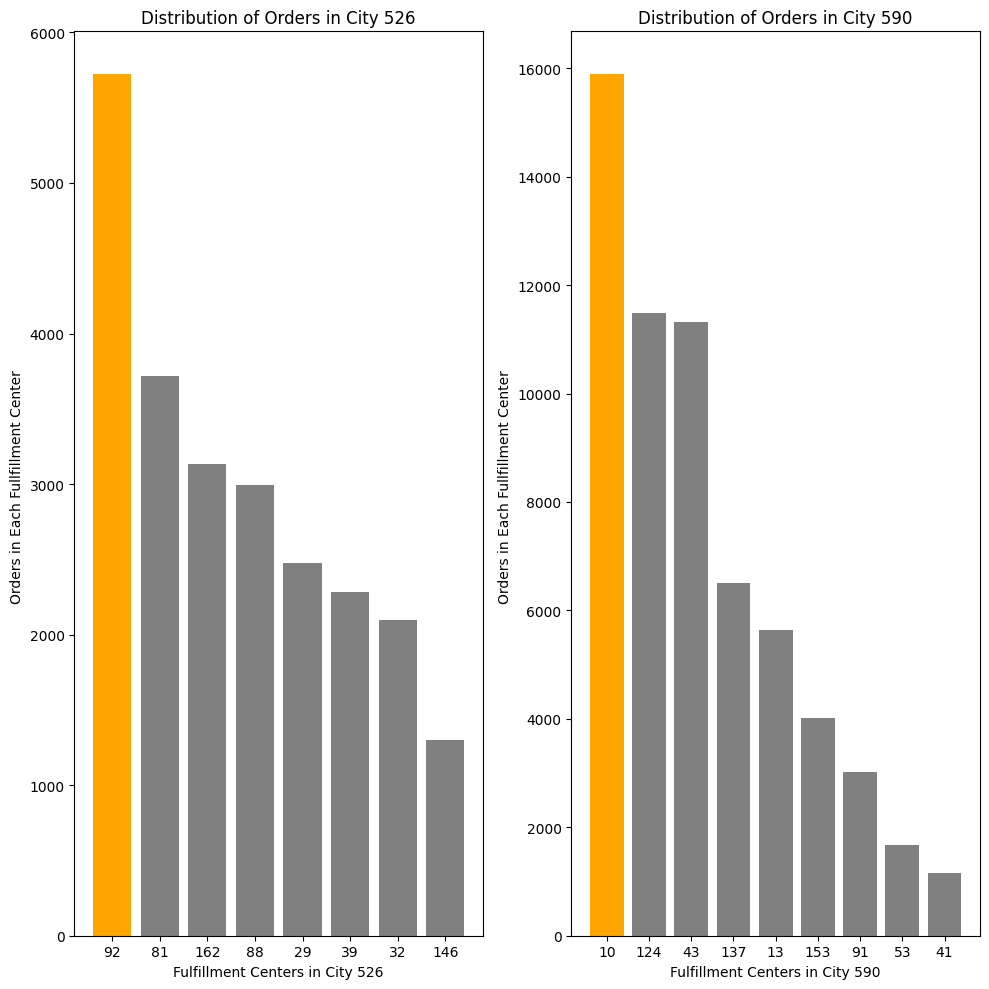

In [8]:
#Distribution of orders in Cities with more than 3 Fulfillment Centers 
city526=df[df['city_code']==526]['center_id'].unique()
city526=list(city526)
order526=[]
for i in city526:
        j=df[df['center_id']==i]['orders'].sum()
        order526.append(j)
city526=list(map(str,city526))
#city 590
city590=df[df['city_code']==590]['center_id'].unique()
city590=list(city590)
order590=[]
for i in city590:
        j=df[df['center_id']==i]['orders'].sum()
        order590.append(j)
city590=list(map(str,city590))
order526.sort(reverse=True)
order590.sort(reverse=True)
order=[order526,order590]
city=[city526,city590]
cities=[526,590]
row=1
column=2
fig,axs=plt.subplots(row,column,figsize=(10,10)) 
for i in range(2):
    col=max(order[i])
    for x,y in enumerate(order[i]):
        color='orange' if y==col else 'grey'
        axs[i].bar(height=order[i][x],x=city[i][x],color=color)
    axs[i].set_title('Distribution of Orders in City'+ ' ' + str(cities[i]))
    axs[i].set_xlabel('Fulfillment Centers in City'+' '+ str(cities[i]))
    axs[i].set_ylabel('Orders in Each Fullfillment Center ')
plt.tight_layout() 
plt.show()

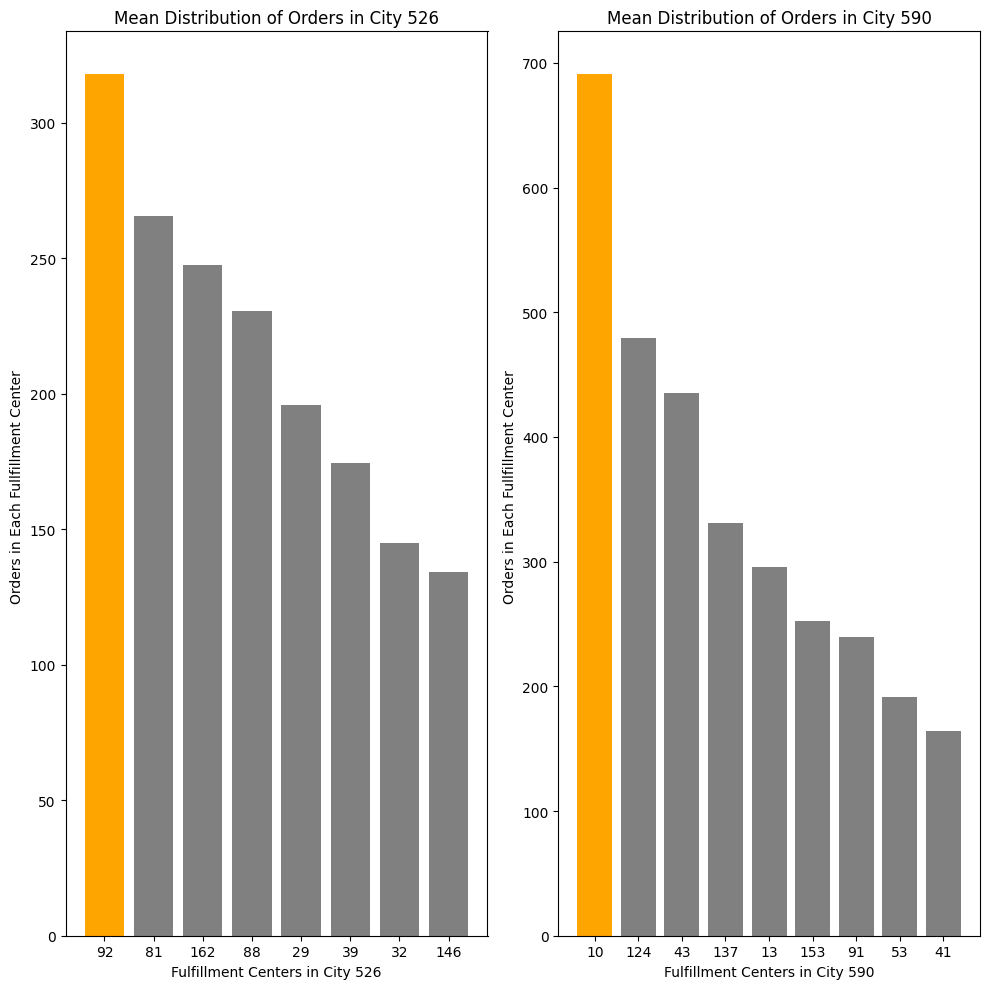

In [78]:
#Mean Distribution of orders in Cities with more than 3 Fulfillment Centers 
city526=df[df['city_code']==526]['center_id'].unique()
city526=list(city526)
order526=[]
for i in city526:
        j=df[df['center_id']==i]['orders'].mean()
        order526.append(j)
city526=list(map(str,city526))
#city 590
city590=df[df['city_code']==590]['center_id'].unique()
city590=list(city590)
order590=[]
for i in city590:
        j=df[df['center_id']==i]['orders'].mean()
        order590.append(j)
city590=list(map(str,city590))
order526.sort(reverse=True)
order590.sort(reverse=True)
order=[order526,order590]
city=[city526,city590]
cities=[526,590]

fig,axs=plt.subplots(1,2,figsize=(10,10)) 
for i in range(2):
    longest_bar_height = max(order[i])
    for j, height in enumerate(order[i]):
        color = 'orange' if height == longest_bar_height else 'grey'
        axs[i].bar(x=city[i][j], height=height, color=color)
    axs[i].set_title('Mean Distribution of Orders in City'+ ' ' + str(cities[i]))
    axs[i].set_xlabel('Fulfillment Centers in City'+' '+ str(cities[i]))
    axs[i].set_ylabel('Orders in Each Fullfillment Center ')
plt.tight_layout() 
plt.show()

In [11]:
# what's the average order per fulfillment center
ave=df['orders'].mean().round()
print(ave)


261.0


In [12]:
# % of email campaigns featured orders
round(100 * (df[(df['emailer']==1)]['orders'].value_counts().sum()/df['orders'].value_counts().sum()),2)

7.35

In [13]:
#average of email featured orders
df[(df['emailer']==1)]['orders'].mean()

619.3367346938776

In [14]:
emailed=df[(df['emailer']==1)]

In [15]:
import numpy as np
np.random.seed(123)
no_e=df[~(df['emailer']==1)].sample(98)

In [16]:
#median of orders of non-emailed featured orders 
no_e['orders'].median()

121.0

In [17]:
#median of orders of emailed featured orders 
emailed['orders'].median()

351.5

In [18]:
#Due to the skewness of the data, the median was considered for the analysis.
#the total  number of emailed featured orders is 98, so i randomly sampled 98 non emailed feaatured orders.
# non emialed= 121, email=351
#percentile

In [19]:
#percentile of non-emailed featured orders
np.quantile(no_e['orders'],[0.25,0.50,0.75,1])

array([  53.  ,  121.  ,  289.75, 2105.  ])

In [79]:
#percentile of emailed featured orders
np.quantile(emailed['orders'],[0.25,0.50,0.75,1])

array([ 149. ,  351.5,  641.5, 7399. ])

In [21]:
print(emailed['orders'].mean(),no_e['orders'].mean())

619.3367346938776 210.8265306122449


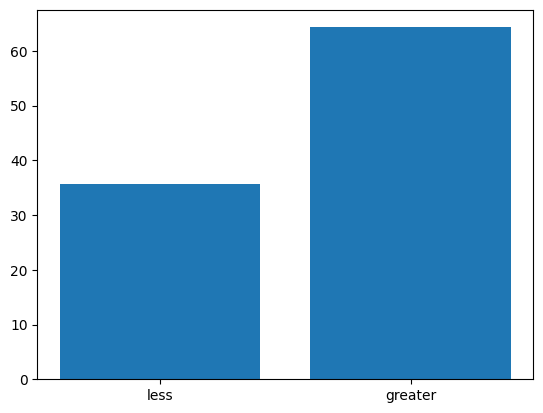

[35.71, 64.29]


In [22]:
# Comapred to the non-email fetaured average
greater=round(100*(df[(df['emailer']==1) & (df['orders']>232)]['orders'].value_counts().sum()/df[(df['emailer']==1)]['orders'].value_counts().sum()),2)
less=round(100-greater,2)

email_g=[less,greater]
plt.bar(height=email_g,x=['less','greater'])
plt.title('')
plt.show()
print(email_g)


In [46]:
#Website featurre orders
featured=df[(df['featured']==1)]

In [48]:
featured['orders'].describe()

count     151.000000
mean      552.993377
std       825.148459
min        13.000000
25%       149.000000
50%       323.000000
75%       655.500000
max      7399.000000
Name: orders, dtype: float64

In [25]:
featured['id'].nunique()

151

In [26]:
no_f=df[~(df['featured']==1)].sample(151)

In [27]:
no_f['orders'].describe()

count     151.000000
mean      201.966887
std       203.596477
min        13.000000
25%        53.000000
50%       135.000000
75%       284.500000
max      1095.000000
Name: orders, dtype: float64

In [ ]:
#Orders were both featured on website and email

In [52]:
df[(df['emailer']==1) & (df['featured']==1)]['orders'].describe()

count      54.000000
mean      822.037037
std      1190.754129
min        41.000000
25%       242.250000
50%       473.000000
75%       881.000000
max      7399.000000
Name: orders, dtype: float64

In [54]:
gr=df[(df['emailer']==1) & (df['featured']==1)]

Text(0, -0.02, 'Total Email Featured Meals')

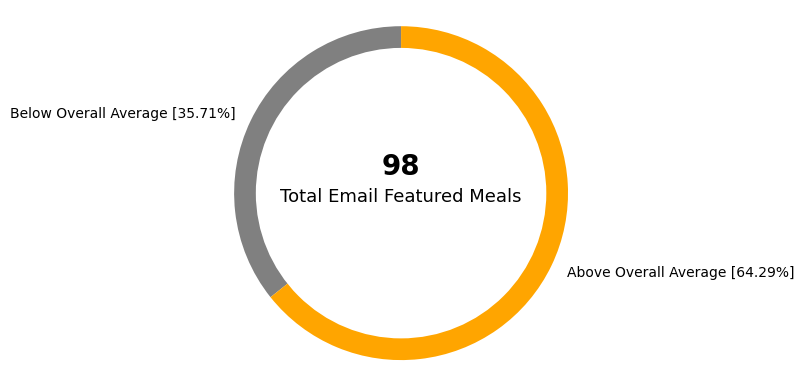

In [28]:

plt.pie(email_g,labels=['Below Overall Average [35.71%]','Above Overall Average [64.29%]'],startangle=90,colors=('grey','orange'))
plt.axis('equal')
Circle=plt.Circle(xy=(0,0),radius=.87,facecolor='white')
plt.gca().add_artist(Circle)
plt.text(0, 0.16, "98", horizontalalignment='center', verticalalignment='center', fontsize=20, fontweight='bold',color='black')

plt.text(0, -0.02, "Total Email Featured Meals", horizontalalignment='center', verticalalignment='center', fontsize=13, color='black')


In [30]:
# Percentage greater than the average order of featured promotion
round(100 * (df[(df['featured']==1)]['orders'].value_counts().sum()/df['orders'].value_counts().sum()),2)

11.33

In [31]:
# % of email campaigns that had orders greater than the average of email featured orders...
above=round(100*(df[(df['featured']==1) & (df['orders']>231)]['orders'].value_counts().sum()/df[(df['featured']==1)]['orders'].value_counts().sum()),2)
below=round(100-less,2)

featured=[above,below]
print(featured)

[58.28, 64.29]


Text(0.5, 1.0, 'Percentage of Promoted Meals with Orders Above/Below Overall Average Orders')

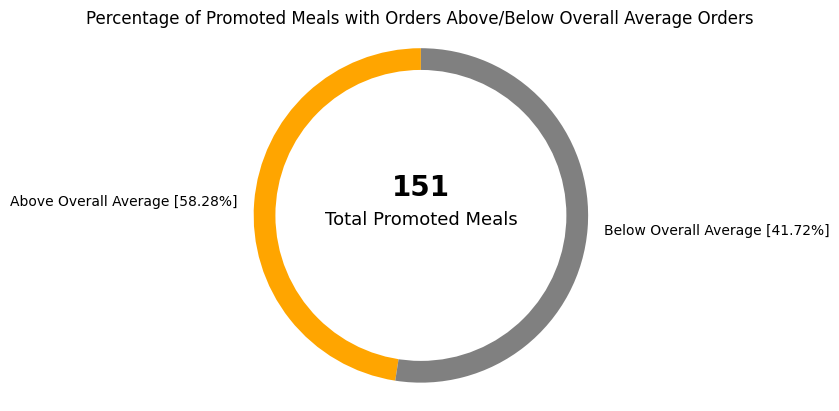

In [32]:
plt.pie(featured,labels=['Above Overall Average [58.28%]','Below Overall Average [41.72%]'],startangle=90,colors=('orange','grey'))
plt.axis('equal')
Circle=plt.Circle(xy=(0,0),radius=0.87,facecolor='white')
plt.gca().add_artist(Circle)
plt.text(0,0.17,'151',horizontalalignment='center',verticalalignment='center',fontsize=20,fontweight='bold')
plt.text(0,-0.02,'Total Promoted Meals',ha='center',va='center',fontsize=13)
plt.title('Percentage of Promoted Meals with Orders Above/Below Overall Average Orders')

In [33]:
df[df['featured']==1]['orders'].value_counts().sum()

151

In [81]:
#Function that return the fulfillment centers in each center
def city_code(a):
    new=df[df['city_code']==a]
    n=new['center_id'].unique()
    n=list(n)
    return n
city_code(590)
    
    

[10, 124, 43, 137, 13, 153, 91, 53, 41]

In [82]:
#Difference between avergae orders in each fulfillment center and the average of the region.
#average of each center type
center_type=['A','B','C']
type_avg=[]
for i in center_type:
    avg=df[df['center_type']==i]['orders'].mean()
    type_avg.append(avg)
new=[]
center_id=[92, 81, 162, 88, 29, 39, 32, 146]
center_id.sort()
# if statement that checks if the center_id belongs to a particular center type
for j in center_id:
    us=df[df['center_id']==j]['orders']
    if ['C'] == list(df[df['center_id']==j]['center_type'].unique()):
        n=us.mean()-type_avg[1]
    elif ['B'] == list(df[df['center_id']==j]['center_type'].unique()):
        n=us.mean()-type_avg[1]
    else:
        n=us.mean()-type_avg[0]
    new.append(round(n,2))
    
print(new)
print(center_id)
a=['29', '32', '39', '81', '88', '92', '146', '162']

[-133.15, -78.67, -184.12, 12.18, -22.79, -194.61, -11.07, -81.5]
[29, 32, 39, 81, 88, 92, 146, 162]


Text(0.5, 1.0, 'Average Orders in Each Fulfillment Centers VS The Average Order in Each Center Type')

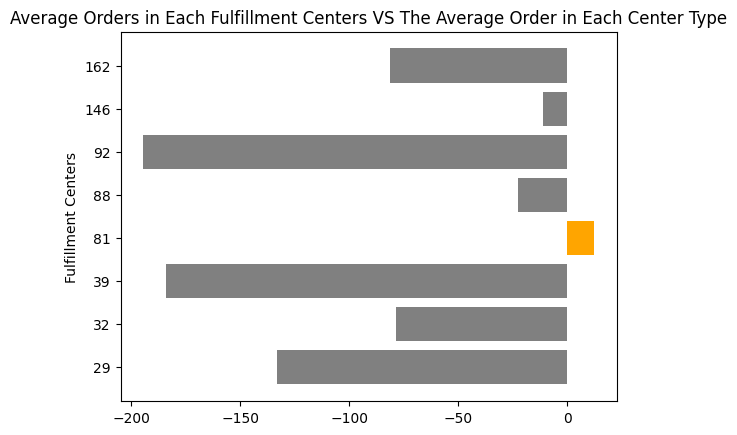

In [36]:
color=[]
for i in new:
    if i<0:
        color.append('grey')
    else:
        color.append('orange')
plt.barh(width=new,y=a,color=color)
plt.ylabel('Fulfillment Centers')
plt.title('Average Orders in Each Fulfillment Centers VS The Average Order in Each Center Type')

In [37]:
#Difference between avergae orders in each fulfillment center and the average of the region.
#average of each center type
center_type=['A','B','C']
type_avg=[]
for i in center_type:
    avg=df[df['center_type']==i]['orders'].mean()
    type_avg.append(avg)
new=[]
center_id=[10, 124, 43, 137, 13, 153, 91, 53, 41]
center_id.sort()
# if statement that checks if the center_id belongs to a particular center type
for j in center_id:
    us=df[df['center_id']==j]['orders']
    if ['C'] == list(df[df['center_id']==j]['center_type'].unique()):
        n=us.mean()-type_avg[2]
    elif ['B'] == list(df[df['center_id']==j]['center_type'].unique()):
        n=us.mean()-type_avg[1]
    else:
        n=us.mean()-type_avg[0]
    new.append(round(n,2))
        
print(new)
print(type_avg)
a=['10', '13', '41', '43', '53', '91', '124', '137', '153']

[106.72, 361.84, -42.63, 225.71, -61.77, 32.8, 45.54, 42.3, 78.04]
[253.2496714848883, 328.8993288590604, 206.62773722627736]


Text(0.5, 1.0, 'Average Orders in Each Fulfillment Centers VS The Average Order in Each Center Type')

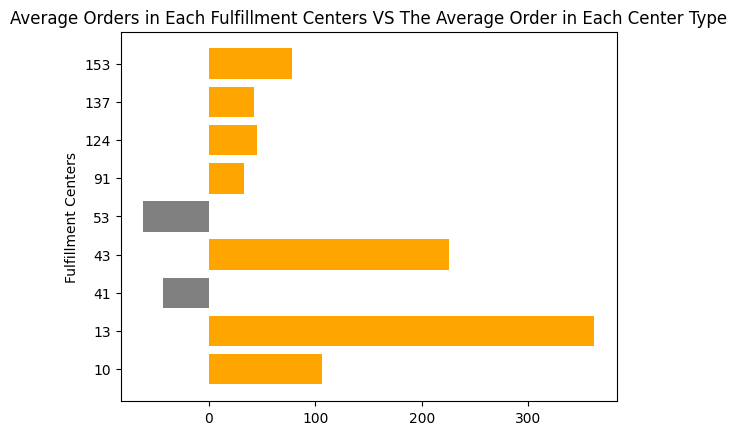

In [38]:
color=[]
for i in new:
    if i<0:
        color.append('grey')
    else:
        color.append('orange')
plt.barh(width=new,y=a,color=color)
plt.ylabel('Fulfillment Centers')
plt.title('Average Orders in Each Fulfillment Centers VS The Average Order in Each Center Type',)